In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
import pandas as pd


# Credit Card Fraud Detection - Mini Project


df = pd.read_csv("C:\\Users\\ssain\\Downloads\\creditcard.csv")

In [45]:
# Show the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
df.shape


(284807, 31)

In [47]:
df.describe()

# The dataset has 284,807 rows and 31 columns.

# The features V1 through V28 are the result of a PCA transformation.

# The 'Class' column is highly imbalanced

# This indicates that the number of fraudulent transactions is very low compared to the number of 
# legitimate transactions, which is expected in a real-world scenario.

# The 'Time' and 'Amount' features are not scaled, unlike V1-V28.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [48]:
# We can see the imbalance here. 1 indicated Fraud.

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# PREPROCESSING --

# Most features are already preprocessed due to the PCA transformation. That said, there are still a few things we can do:

# Scaling: Features like 'Time' and 'Amount' are not scaled. We might want to scale them to have zero mean
# and unit variance, like the PCA-transformed features.

# Class Imbalance: We need to decide how to handle the imbalanced target classes. Some common techniques 
# include oversampling the minority class, undersampling the majority class, or using a combination of both (SMOTE).

# These will both be done using a pipeline to avoid data leakage during cross-validation.


In [49]:
# Split the data into training and testing sets (70% training and 30% testing)

from sklearn.model_selection import train_test_split

# Features (X) and target (y) variables
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((199364, 30), (85443, 30), (199364,), (85443,))

******* Logistic Regression 

In [61]:
# # Lets assess performance of the default Logistic Regression using cross-validation.
# Time and Amount columns need to be scaled. Training data needs to be resampled using SMOTE.


# Column indices for 'Time' and 'Amount' 
time_idx, amount_idx = 0, 29 

# Create a ColumnTransformer that will scale the 'Time' and 'Amount' columns
preprocessor = ColumnTransformer(
    transformers=[
        ('scale_time', StandardScaler(), [time_idx]),
        ('scale_amount', StandardScaler(), [amount_idx])
    ], 
    remainder='passthrough'
)


# Create the complete pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('SMOTE', SMOTE(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
])


# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute the cross-validation scores
scoring = ['accuracy', 'precision', 'recall']

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)



# Print each metric
print(f"Logistic Regression assessed through cross-validation:")
for metric, scores in cv_results.items():
    if 'test_' in metric:  # We're interested in test metrics
        print(f"{metric}: {np.mean(scores):.3f} (+/- {np.std(scores):.3f})")



Logistic Regression assessed through cross-validation:
test_accuracy: 0.977 (+/- 0.001)
test_precision: 0.066 (+/- 0.004)
test_recall: 0.916 (+/- 0.011)


In [62]:
# The pipeline contains the resampling method (SMOTE), scaling approach and the
# machine learning model (Logistic Regression).
# When we call pipeline.fit(X_train, y_train), it executes the following steps in sequence:

# SCALING: The time and amount columns are scaled in the training folds, and those paramters are 
# used to approprately scale the test folds.
# SMOTE Resampling: The pipeline performs the Synthetic Minority Over-sampling Technique
# (SMOTE) on the training dataset X_train and y_train. This process will balance the classes by
# generating synthetic samples.
# Model Training: After the oversampling is complete, the balanced dataset is used to train the 
# Random Forest Classifier

pipeline.fit(X_train, y_train)


# Make predictions on the final test set
y_pred = pipeline.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Logistic Regression Final Test Set Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{confusion}")

Logistic Regression Final Test Set Metrics:
Accuracy: 0.9773182121414277
Precision: 0.06341463414634146
Recall: 0.8783783783783784
F1 Score: 0.11828935395814379
Confusion Matrix: 
[[83375  1920]
 [   18   130]]


In [ ]:
# Interpretation
# Accuracy: The model correctly classified about 97.7% of the transactions, which might seem high
# but is not the best metric to consider in imbalanced datasets.

# Precision: Of the transactions that the model predicted as fraudulent, only about 6.34%
# were actually fraudulent. This is very low, indicating a high number of false positives.

# Recall: The model successfully identified 87.84% of all actual fraudulent transactions. 
# This is relatively high, which is often the primary goal in fraud detection.

# This logisitic regression model does not perform well for our purposes.

In [ ]:
# Importance of Recall

# High Cost of False Negatives: In fraud detection, a false negative (i.e., failing to identify a fraudulent transaction)
# could potentially mean significant financial loss or legal complications. Therefore, minimizing false negatives is 
# crucial, and this is captured by a high recall score.

******* Random Forest **********

In [63]:
# Lets assess performance of Random Forest using cross-validation.
# We need to create a pipeline to preprocess the data and avoid leakage.
# Time and Amount columns need to be scaled. Training data needs to be resampled using SMOTE


# Column indices for 'Time' and 'Amount' 
time_idx, amount_idx = 0, 29 

# Create a ColumnTransformer that will scale the 'Time' and 'Amount' columns
preprocessor = ColumnTransformer(
    transformers=[
        ('scale_time', StandardScaler(), [time_idx]),
        ('scale_amount', StandardScaler(), [amount_idx])
    ], 
    remainder='passthrough'
)


# Create the complete pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('SMOTE', SMOTE(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
])


# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute the cross-validation scores
scoring = ['accuracy', 'precision', 'recall']

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)



# Print each metric from Cross Validation
print(f"Random Forest assessed through cross-validation:")
for metric, scores in cv_results.items():
    if 'test_' in metric:  # We're interested in test metrics
        print(f"{metric}: {np.mean(scores):.3f} (+/- {np.std(scores):.3f})")





Random Forest assessed through cross-validation:
test_accuracy: 1.000 (+/- 0.000)
test_precision: 0.881 (+/- 0.030)
test_recall: 0.826 (+/- 0.021)


In [53]:
# The pipeline contains the resampling method (SMOTE), scaling approach and the
# machine learning model (Random Forest).

pipeline.fit(X_train, y_train)


# Make predictions on the final test set
y_pred = pipeline.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Random Forest Final Test Set Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{confusion}")


Final Test Set Metrics:
Accuracy: 0.9994382219725431
Precision: 0.8846153846153846
Recall: 0.777027027027027
F1 Score: 0.8273381294964028
Confusion Matrix: 
[[85280    15]
 [   33   115]]


In [ ]:
# Interpretation:

# Accuracy: Nearly 100%, which is expected in imbalanced datasets.

# Precision: High precision (88.5%) means that the model very rarely falsely labels a non-fraudulent transaction as 
# fraudulent.This is excellent and much better than the Logistic Regression model we tried earlier.

# Recall: A recall of 77.7% is also quite good. It means the model is able to identify 
# 77.7% of the total fraudulent transactions, which is a robust performance given that the focus in 
# fraud detection is often on high recall.

# F1-score: An F1-score of 83.97% suggests a balanced model in terms of precision and recall, especially
# compared to the Logistic Regression model.

# The Random Forest model seems to perform very well on this dataset.

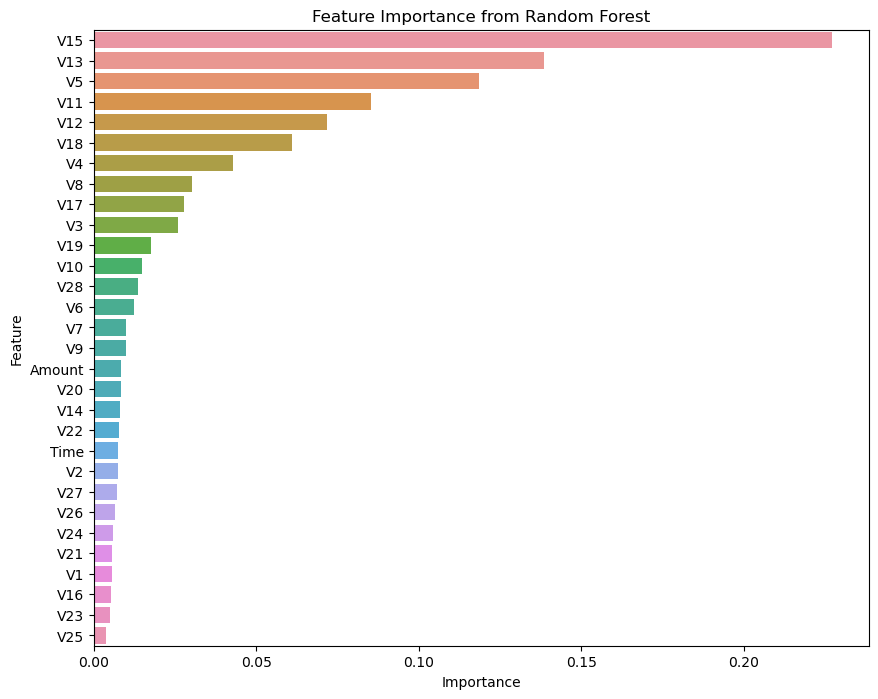

In [56]:
# Random Forest Feature Importances

# Access the Random Forest Classifier model from the pipeline
rf_model = pipeline.named_steps['Random Forest']

# Extract feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by the importances
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
